In [1]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [2]:
import os
os.chdir('/Users/rajatpa/Documents/DS/Time_Series_with_python')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm

In [3]:
# The Lynx Dataset and Time Series Vectors and Lags
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)
display(mylynx_df.head(5),mylynx_df.tail(5))

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


,trappings
year,
1930,662
1931,1000
1932,1590
1933,2657
1934,3396


In [4]:
display(type(mylynx_df.index),type(mylynx_df))

pandas.core.indexes.numeric.Int64Index

pandas.core.frame.DataFrame

In [5]:
display(mylynx_df[["trappings"]].head(),mylynx_df.trappings.head())

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


year
1821     269
1822     321
1823     585
1824     871
1825    1475
Name: trappings, dtype: int64

In [6]:
type(mylynx_df.trappings.head())

pandas.core.series.Series

In [7]:
# Converting the DataFrame into a Series object
# Reusing existing index - the new object inherits the index
# Basically extracting the 'trappings' column from my data
mylynxts_simple = mylynx_df['trappings']
display(type(mylynxts_simple),type(mylynxts_simple.index))

pandas.core.series.Series

pandas.core.indexes.numeric.Int64Index

In [8]:
mylynxts_simple.head()

year
1821     269
1822     321
1823     585
1824     871
1825    1475
Name: trappings, dtype: int64

In [9]:
# Converting the DataFrame into a Series object
# New index generation with proper date index
# Frequency is freq='A' for end of year frequency
# so we can see outputs like 1821-12-31,1823-12-31
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC'))


In [10]:
# Note the new index format (d-m-Y)
mylynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [11]:
display(type(mylynxts.index),type(mylynxts))

pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.series.Series

In [12]:

# Test for Stationarity
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller Test
    Test for Stationarity"""
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [13]:
# Test application on the Lynx dataset
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


In [14]:
# Test application on random normally distributed numbers
# here mean is 1 and standard deviation is 3
stationarity_test(np.random.normal(1, 3, 300))

Results of Dickey-Fuller Test:
Test Statistic                -1.458998e+01
p-value                        4.330039e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.990000e+02
dtype: float64


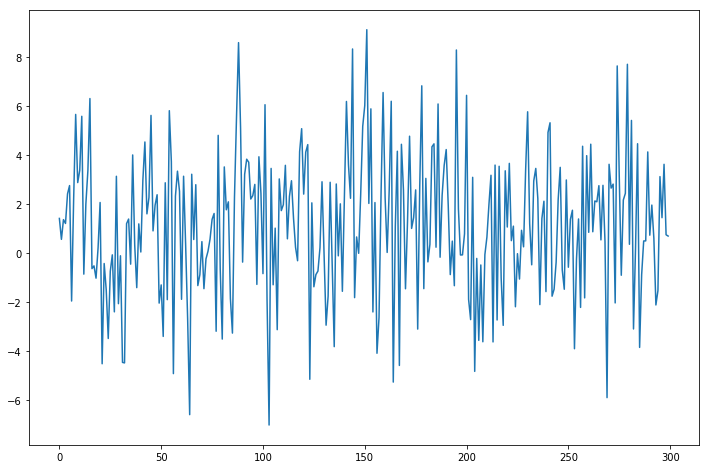

In [15]:
# Note the characteristics of stationary data on the plot
plt.figure(figsize=(12,8))
plt.plot(np.random.normal(1, 3, 300))

In [16]:
# Test application on a vector of numbers
mydata = (3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)

stationarity_test(mydata)

Results of Dickey-Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    5.000000
dtype: float64


/anaconda3/envs/ML/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


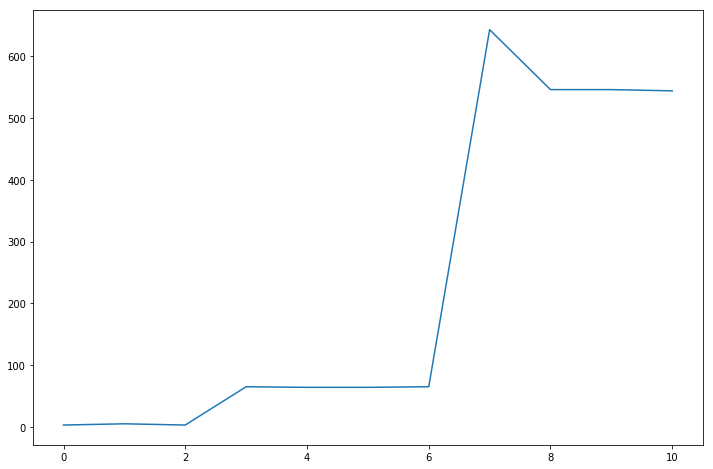

In [17]:
# Note the three levels in the data
plt.figure(figsize=(12,8))
plt.plot(mydata)

In [18]:
# Classic ACF and PACF Plots for Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

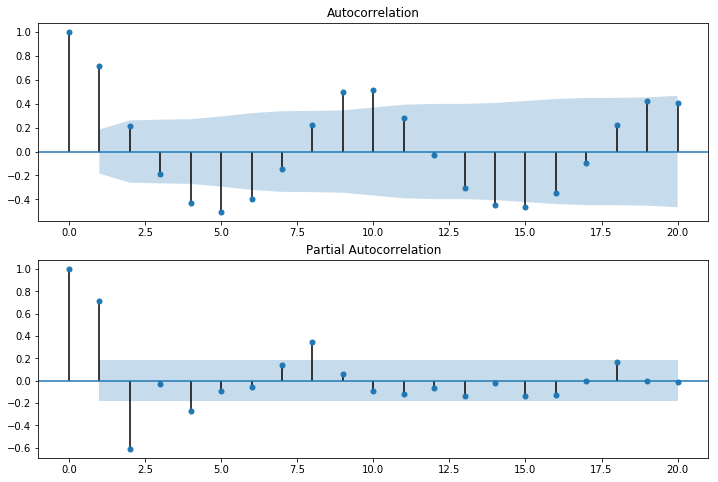

In [19]:
# Autocorrelation and partical autocorrelation in the Lynx dataset
# Two plots on one sheet
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

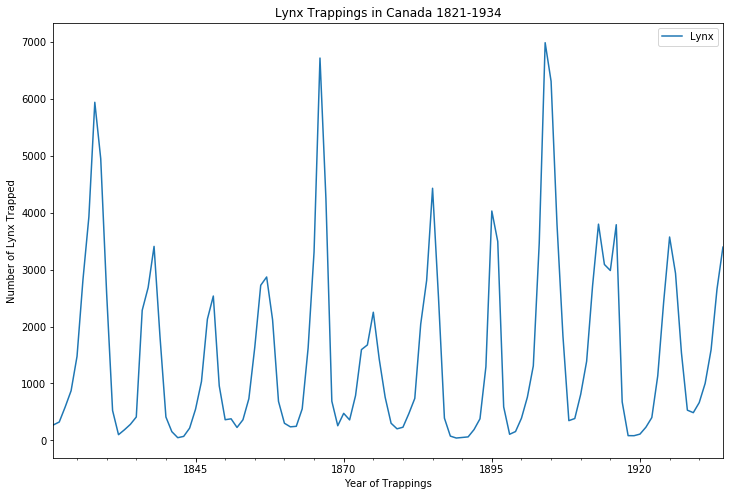

In [20]:
# Visualizing Time Series in Python
# Line graph with matplotlib pyplot module
plt.figure(figsize=(12,8))
mylynxts.plot()
plt.title('Lynx Trappings in Canada 1821-1934')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of Lynx Trapped')
plt.legend(['Lynx'])

In [21]:
# Plotting two series on the same plot
# Getting the cumsum of mylynxts
# Series object, therefore the index is inherited
cumsum_lynx = np.cumsum(mylynxts)
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

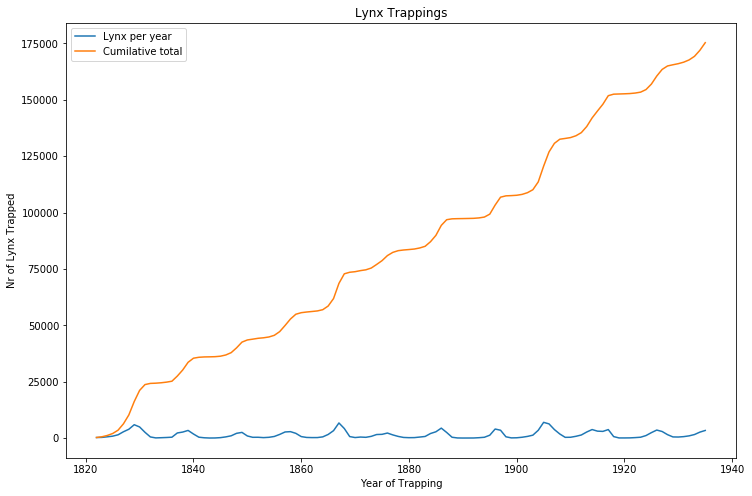

In [22]:
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title('Lynx Trappings')
plt.xlabel('Year of Trapping')
plt.ylabel('Nr of Lynx Trapped')
plt.legend(['Lynx per year', 'Cumilative total'])

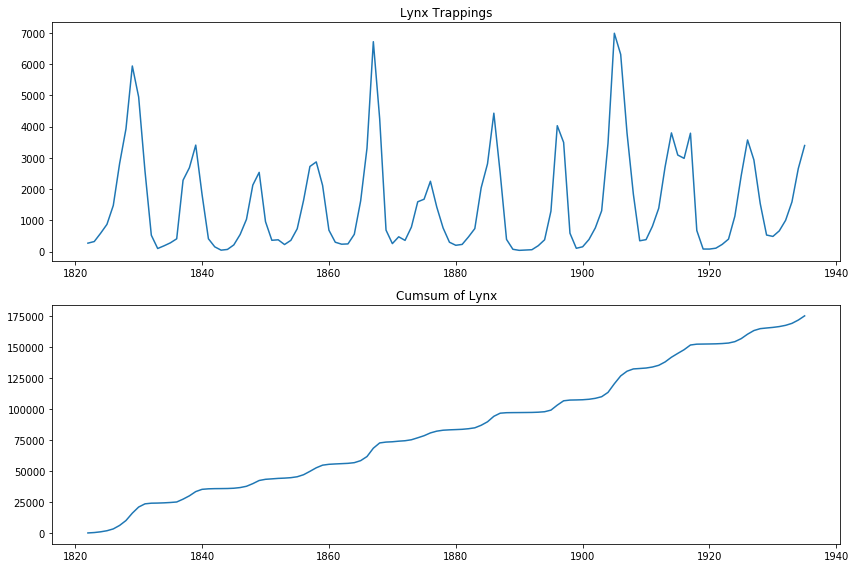

In [23]:
# Getting two visualizations in the same output cell
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(mylynxts)
plt.title('Lynx Trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

In [24]:
# Simple moving (rolling) calculations
# Note: the rolling methods are applicable only on pandas Series and DataFrame objects
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()
    

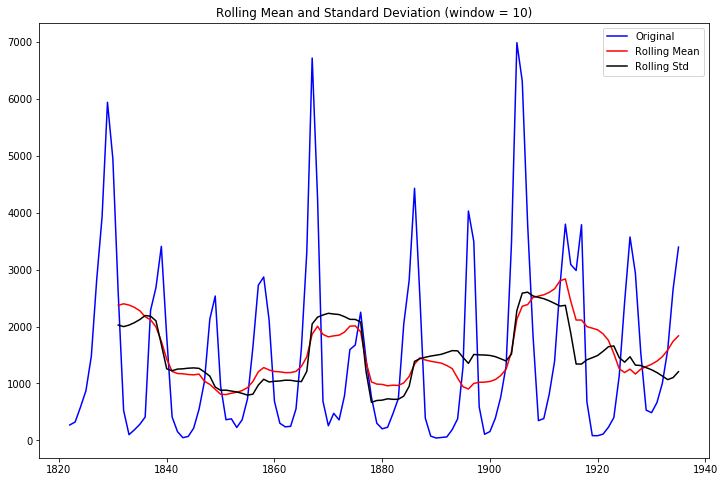

In [25]:
plot_rolling(mylynxts,10)

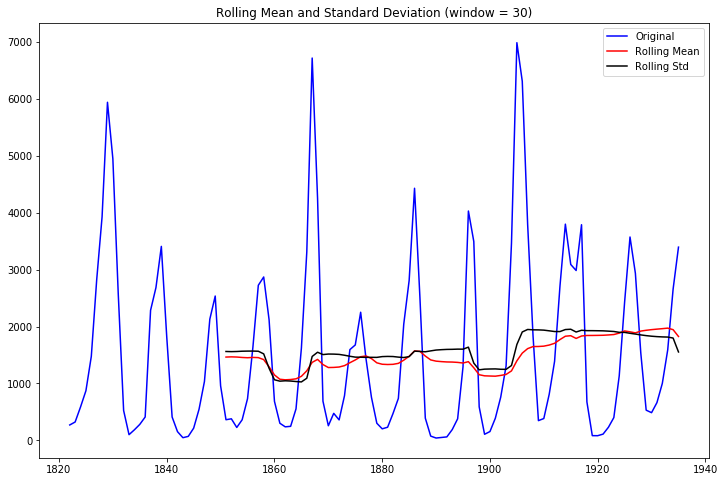

In [26]:
# For smotheer we have to take more smaples in the window varaible
plot_rolling(mylynxts,30)

In [27]:
# Getting the smooth values only
mylynxts.rolling(10).mean()

1821-12-31       NaN
1822-12-31       NaN
1823-12-31       NaN
1824-12-31       NaN
1825-12-31       NaN
1826-12-31       NaN
1827-12-31       NaN
1828-12-31       NaN
1829-12-31       NaN
1830-12-31    2374.0
1831-12-31    2399.4
1832-12-31    2377.1
1833-12-31    2337.0
1834-12-31    2277.8
1835-12-31    2171.2
1836-12-31    2117.6
1837-12-31    1993.3
1838-12-31    1739.9
1839-12-31    1427.3
1840-12-31    1210.5
1841-12-31    1173.3
1842-12-31    1168.0
1843-12-31    1156.4
1844-12-31    1149.8
1845-12-31    1163.5
1846-12-31    1038.3
1847-12-31     982.7
1848-12-31     895.4
1849-12-31     808.7
1850-12-31     803.9
               ...  
1905-12-31    2356.1
1906-12-31    2386.0
1907-12-31    2510.9
1908-12-31    2534.9
1909-12-31    2557.8
1910-12-31    2599.9
1911-12-31    2662.9
1912-12-31    2803.5
1913-12-31    2837.0
1914-12-31    2447.0
1915-12-31    2114.2
1916-12-31    2113.8
1917-12-31    1997.6
1918-12-31    1971.2
1919-12-31    1941.0
1920-12-31    1871.0
1921-12-31   

In [28]:
# Simple rolling calculation with minimum number of periods
def plot_rolling2(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods = 1).mean()
    rol_std = timeseries.rolling(window, min_periods = 1).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

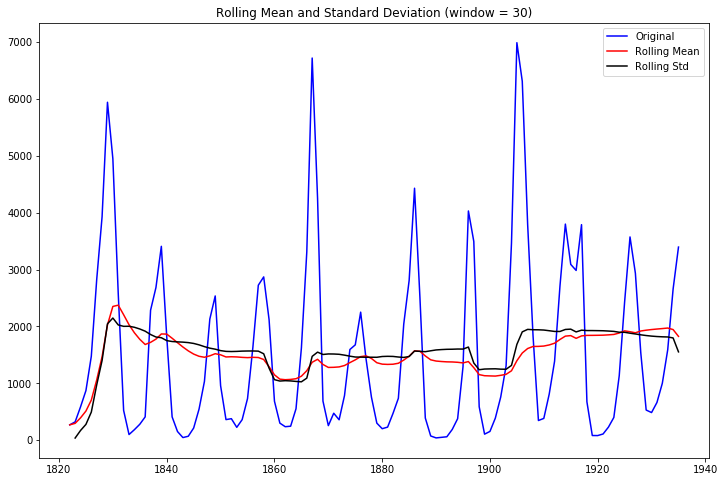

In [29]:
# No NA values, but shorter window size
plot_rolling2(mylynxts, 30)

In [30]:
# Getting the smooth values only - minimum periods = 1
mylynxts.rolling(30, min_periods = 1).mean()

1821-12-31     269.000000
1822-12-31     295.000000
1823-12-31     391.666667
1824-12-31     511.500000
1825-12-31     704.200000
1826-12-31    1057.000000
1827-12-31    1467.142857
1828-12-31    2026.625000
1829-12-31    2351.444444
1830-12-31    2374.000000
1831-12-31    2205.727273
1832-12-31    2030.083333
1833-12-31    1888.076923
1834-12-31    1773.142857
1835-12-31    1682.200000
1836-12-31    1719.875000
1837-12-31    1776.647059
1838-12-31    1867.333333
1839-12-31    1865.052632
1840-12-31    1792.250000
1841-12-31    1714.095238
1842-12-31    1638.227273
1843-12-31    1569.956522
1844-12-31    1513.416667
1845-12-31    1474.720000
1846-12-31    1457.730769
1847-12-31    1482.592593
1848-12-31    1520.214286
1849-12-31    1500.793103
1850-12-31    1462.800000
                 ...     
1905-12-31    1532.300000
1906-12-31    1611.233333
1907-12-31    1647.233333
1908-12-31    1648.766667
1909-12-31    1654.800000
1910-12-31    1674.100000
1911-12-31    1704.733333
1912-12-31  

In [31]:
# Exponentially Weighted Moving Average
# Note: the ewm method is applicable on pandas Series and DataFrame objects only
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize = (12, 8))
    og_line = plt.plot(timeseries, color = "blue", label = "Original")
    exwm_line = plt.plot(expw_ma, color = "red", label = "EWMA")
    plt.legend(loc = "best")
    plt.title("EWMA (alpha= "+str(alpha)+")")
    plt.show()

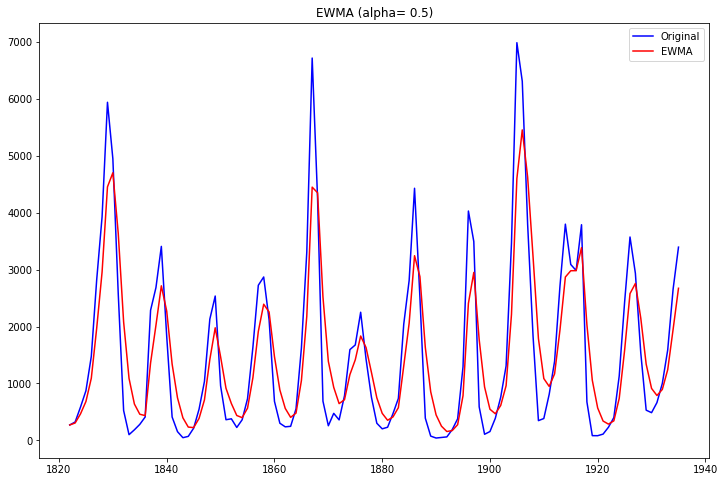

In [32]:
plot_ewma(mylynxts, 0.5)

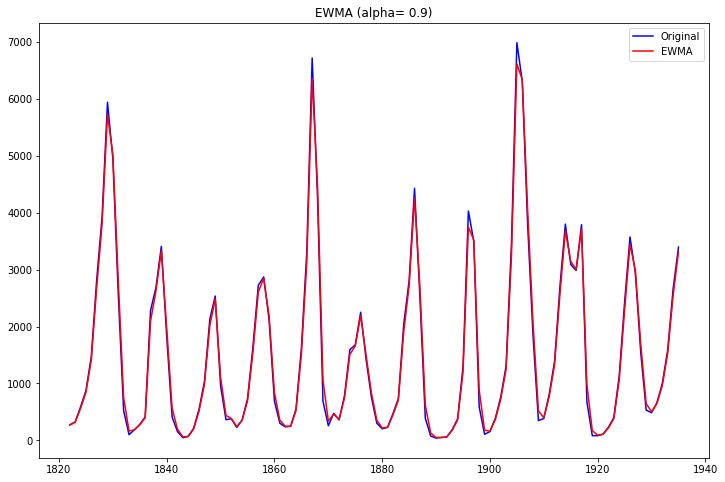

In [33]:
plot_ewma(mylynxts, 0.9)

In [34]:
# ARIMA Models in Python
# ARIMA Parameter Selection
# Note the date format (DatetimeIndex + tuple), it is required for the ARIMA function we use below
mylynxts = pd.Series(mylynx_df['trappings'].values,
                 index = pd.DatetimeIndex(data = (tuple(pd.date_range('31/12/1821',
                                                                      periods = 114,
                                                                      freq = 'A-DEC'))),
                                          freq = 'A-DEC'))

In [35]:
display(mylynxts.head(),mylynxts.tail())

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [36]:
# Test for stationarity - Parameter d
# Applying the Augmented Dickey-Fuller test function we created in the previous section
# Here the P-value is significant as the value is less than 0.05
# So we can say that the DataSet is stationary so the parameter d = 0. as we have three parameter(p,d,q)
# P: AutoRegression
# q: Moving Average 
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


In [37]:
# For finding the parameter "P" we need the PACF Plot( it excludes the Auto-corelation) 
# For finding the parameter "q" we need the ACF Plot
# For finding the parameter "d" we need the Dickey-Fuller Test to confirm the Stationary

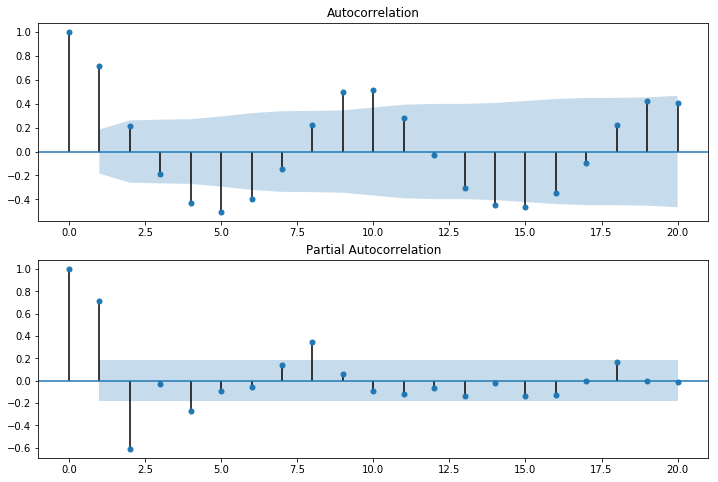

In [38]:
# Tests for autocorrelation and partical autocorrelation - Parameters p, q
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

In [39]:
# ARIMA Model Setup
from statsmodels.tsa.arima_model import ARIMA

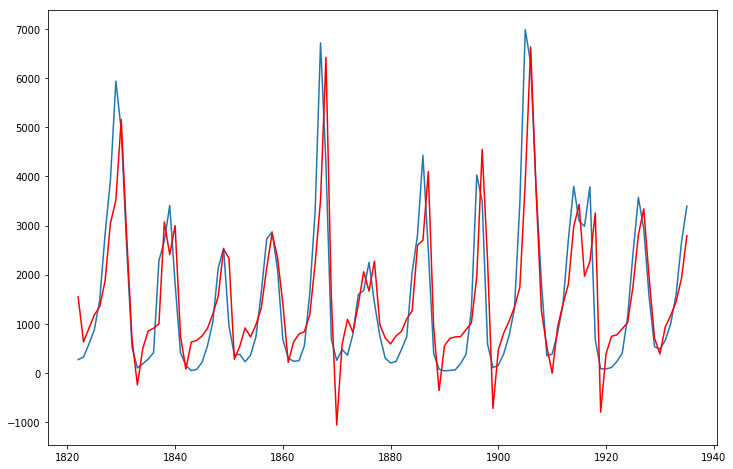

In [40]:
# Using ARIMA for the model, with the argument 'order'
# It is easy to change parameters
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR.fittedvalues, color='red')

In [41]:
# Model Diagnostics
# with this we can see the coeeficents and consants
# We have two important parameters here (i) AIC and (ii) BIC( Base Info Criteria)
# Both AIC and BIC measure the Model Quality
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -935.016
Method:                       css-mle   S.D. of innovations            876.447
Date:                Tue, 02 Apr 2019   AIC                           1878.032
Time:                        13:26:14   BIC                           1888.977
Sample:                    12-31-1821   HQIC                          1882.474
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.3385    181.671      8.506      0.000    1189.269    1901.408
ar.L1.y        1.1474      0.074     15.459      0.000       1.002       1.293
ar.L2.y       -0.5997      0.074     -8.110      0.000      -0.745      -0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9566           -0.8673j            1.2913           -0.1172
AR.2            0.9566           +0.8673j            1.2913            0.1172
-----------------------------------------------------------------------------
"""

In [42]:
# AIC is good for choice for evaluting the Model
# Lower the AIC value better the Model
# All the Patterns should be captured by the Model, only Randomness should stay in the Residuals

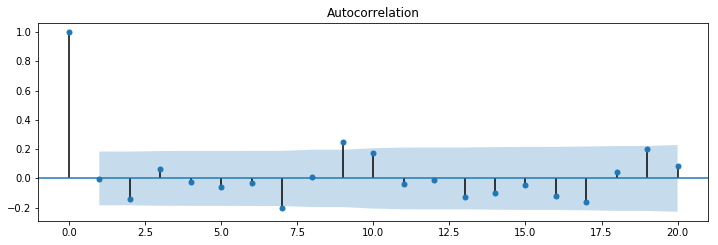

In [43]:
# ACF on Residuals of Our Model
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

In [44]:
# in the above graph we can see the residuals are significant at 7,9 and at 19.


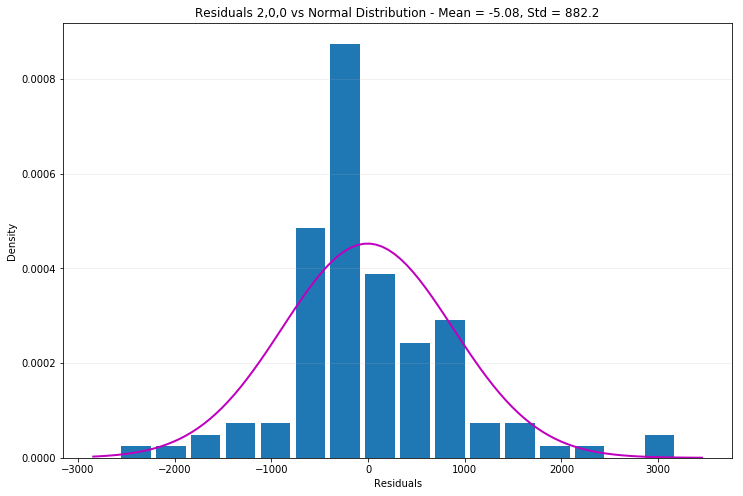

In [45]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

In [46]:
# As the above histogram is not a proper bell curve we have to adjust the parameters.
# We have to eiether increase the MA part or the AR part.

In [47]:
# In the PACF plot we have seen the leg four or point 4 in the graph was significant
# So we can now may increase the parameter "p" which is auto regressive parameter
# We can also try to one or two extra order to MA parameters.


In [48]:
# Repeat the following procedure for models AR(3), AR(4) and AR(5)
# Which one is the most promising?

In [49]:
# Let's re-diagonise the ARIMA of degree 2 in a closer way
# Checking the Residuals: A Close Look
# Example performed on an AR2 model
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR = model.fit()

In [50]:
# The last 5 observations for the original data, the fitted values and the residuals
display(mylynxts.tail(),results_AR.fittedvalues.tail(),results_AR.resid.tail())

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

1930-12-31     938.216692
1931-12-31    1167.701864
1932-12-31    1449.379537
1933-12-31    1923.651379
1934-12-31    2794.113270
Freq: A-DEC, dtype: float64

1930-12-31   -276.216692
1931-12-31   -167.701864
1932-12-31    140.620463
1933-12-31    733.348621
1934-12-31    601.886730
Freq: A-DEC, dtype: float64

In [51]:
# The mean of the residuals
np.mean(results_AR.resid)

-5.084956680995349

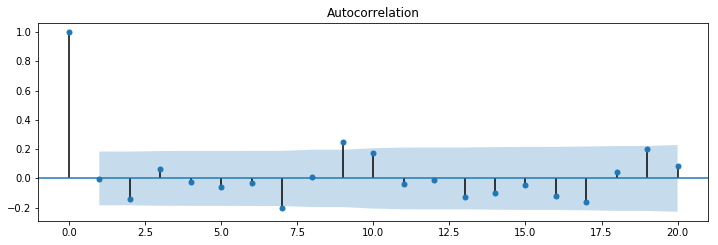

In [52]:
# The ACF Plot
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

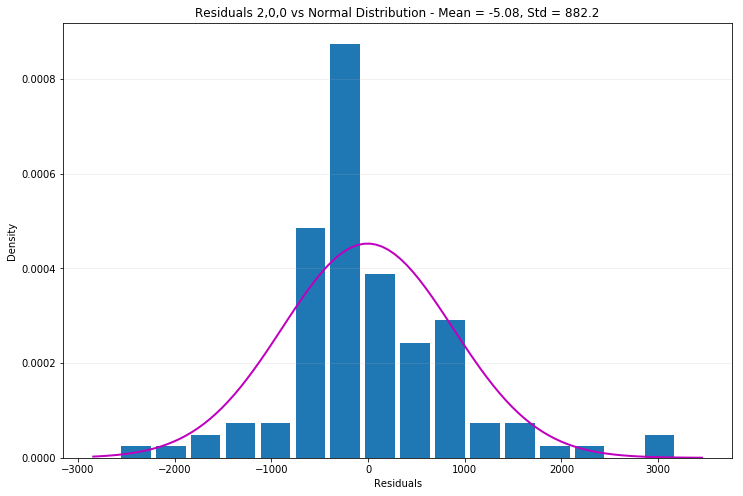

In [53]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

In [54]:
# ARIMA forecasts
# Setting up an ARIMA(4,0,0) model and storing its fitted values
model_AR4 = ARIMA(mylynxts, order=(4, 0, 0))  
results_AR4 = model_AR4.fit()

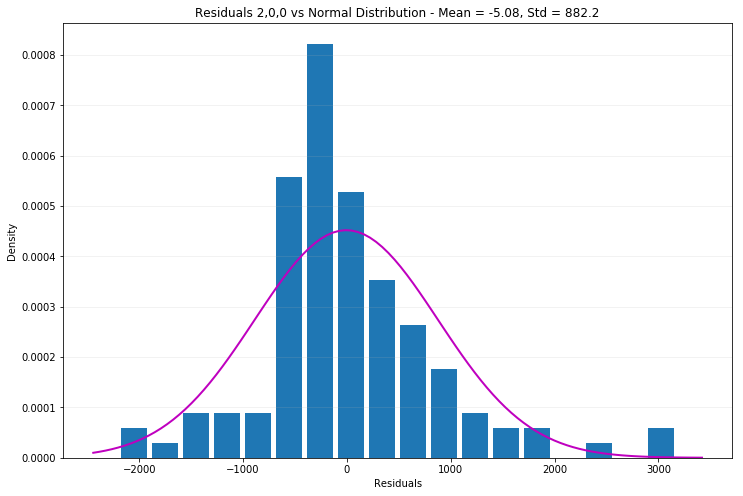

In [55]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR4.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

In [56]:
# Steps to test the ARIMA Model
# (i) Import the Data Set and convert it into a Series Object
# (ii) Test For Stationarity (Dickey-Fuller-Test)
# (iii) Plot the ACF abd PACF plots for finding the Auto -Corelations
# (iv) Setup and ARIMA Model
# (v) Plot the Data Againist the Model 
# (vi) Get a Summary of the Model
# (vi) ACF plot on the residuals
# (vii) Histograms on the Residuals vs Normal Distributions
# (viii) Readjust the ARIMA Model

In [57]:
# Forecast based on the ARIMA(4,0,0) model
Fcast400 = results_AR4.predict(start = '31/12/1935',
                               end = '31/12/1945')

/anaconda3/envs/ML/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [58]:
# For the comparison, let's set up another model
# Arima(2,0,2) model and its fitted values
model202 = ARIMA(mylynxts, order=(2, 0, 2))  
results_M202 = model202.fit()


In [59]:
# Forecast based on the ARIMA(2,0,2) model
Fcast202 = results_M202.predict(start = '31/12/1935',
                                end = '31/12/1945')

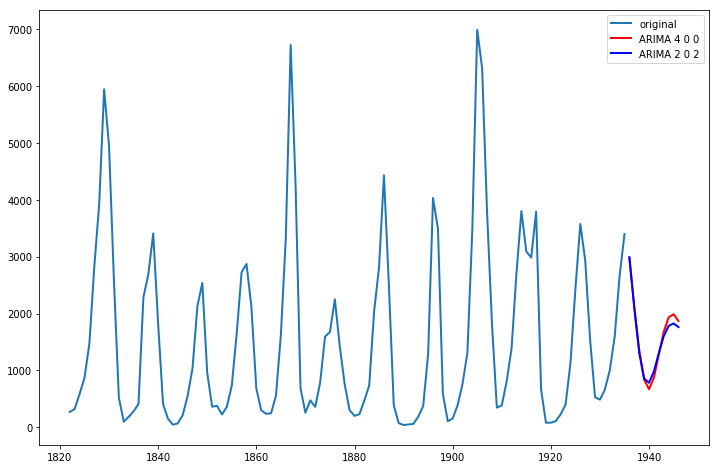

In [60]:
# Comparing the forecasts via data visualization
plt.figure(figsize = (12, 8))
plt.plot(mylynxts, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color='blue', linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend()

In [61]:
# Rules that helps to select the ARIMA Parameters 
# Three categories :
#    (i) Parameters 'd' (ii) Parameters "p" and "q" (iii) Seasonal parameters "P","D" and "Q"
# Rules for finding the right number of Differencing Steps:
    # Add + 1 step to d if high numbers of significant lags are present in the PACF Plot.
    # Avoiding a high "p" parameter
    # If we found in the PACF plot that the First lag is non significant in PACF plot then no Differencing required.
    # If the above happens then the Autocorrelation in the PACF plot should be random or patterenless
    
# If there is no Differencing steps that is "d" = 0, then Data is Stationary (Constant)
# If Differencing steps that is "d" = 1, then Data is Trending Data.
# If Differencing steps that is "d" = 2, then Data is Varying Trend Data( No Constant)

# Rules for Autocorrelation AR and Moving Average:

# Rules for Autocorrelation AR ("p"):
         # Add + step to "p" if the PACF plot shows:
            # Positive significance at lag 1
            # Sharp cutoff between the significant and non significant lags

# Rules for Moving Average MA("q"):
         # Add + step to "q" if the ACF plot shows:
            # Negative significance at lag 1
            # Sharp cutoff between the significant and non significant lags  


# Always AR and MA has effect with each other. So never increase both the 'p' and 'q' to same order.
# If you increase "p" to 1 and "q" to 1 then both effect will nullifuy
# Add Differencing step (d) if the summation of co-effiecents of (AR or MA) is close to 1.
        

In [62]:
# How to identify the seasonal model parameters "P","Q" and "D"
# Need to draw the ACF abd PACF plots having minimum 3 to 4 seasonal cycle data and some buffer
# Set the "D" to +1 if a strong seasonal patteren is present
# It is always advisible not to use more then one value for "D"
# If we observe positive significant lag in all the seasonal cycles  then we can add +1 to "P"
# If we observe negative significant lag in all the seasonal cycles then we can add +1 to "Q"

# Positive Autocorrelation likely to occur if DataSet with non constant seasonal effect 
# and no seaonal Differencing


In [63]:
# Model for Sesonal Data
# Importing the 'nottem' dataset as a pandas DataFrame
nottem = pd.read_csv("nottem.csv", header = 0, parse_dates = [0], names = ['Month', 'Temp'], index_col = 0)
display(nottem.head(5),nottem.tail(5))


,Temp
Month,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


,Temp
Month,
236,61.8
237,58.2
238,46.7
239,46.6
240,37.8


In [64]:
# Conversion to a pandas Series object
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [65]:
display(nottemts.head(5),nottemts.tail(5))

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

1939-08-31    61.8
1939-09-30    58.2
1939-10-31    46.7
1939-11-30    46.6
1939-12-31    37.8
Freq: M, dtype: float64

In [66]:
# Seasonal Decomposition
# Simple seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottemts)

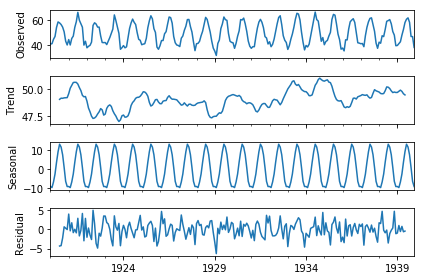

In [67]:
dplot = decomposed.plot()

In [69]:
# Decomposition based on stl - Package: stldecompose
# Install the library via PIP
# Import the decompose function
from stldecompose import decompose

ModuleNotFoundError: No module named 'stldecompose'